<img src='https://media.springernature.com/lw1200/springer-static/image/art%3A10.1038%2Fs41598-020-74091-z/MediaObjects/41598_2020_74091_Fig2_HTML.png'><

In [ ]:
!pip install bio

In [ ]:
!wget http://horfdb.dfci.harvard.edu/docs/hORFeome9.1_annotation.tsv.gz

--2024-08-01 01:20:45--  http://horfdb.dfci.harvard.edu/docs/hORFeome9.1_annotation.tsv.gz
Resolving horfdb.dfci.harvard.edu (horfdb.dfci.harvard.edu)... 18.210.151.165
Connecting to horfdb.dfci.harvard.edu (horfdb.dfci.harvard.edu)|18.210.151.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8149121 (7.8M) [application/octet-stream]
Saving to: ‘hORFeome9.1_annotation.tsv.gz.1’

hORFeome9.1_annotat 100%[===================>]   7.77M  3.60MB/s    in 2.2s    

2024-08-01 01:20:48 (3.60 MB/s) - ‘hORFeome9.1_annotation.tsv.gz.1’ saved [8149121/8149121]



In [ ]:
!gzip -d hORFeome9.1_annotation.tsv.gz

gzip: hORFeome9.1_annotation.tsv already exists; do you wish to overwrite (y or n)? ^C


In [ ]:
!head hORFeome9.1_annotation.tsv

orf_id	ensembl_gene_id	uniprot_AC_iso	symbol	entrez_gene_id	orf_class	cds
1	ENSG00000143933.16	P0DP24	CALM2	805	pcORF	ATGGCTGACCAACTGACTGAAGAGCAGATTGCAGAATTCAAAGAAGCTTTTTCACTATTTGACAAAGATGGTGATGGAACTATAACAACAAAGGAATTGGGAACTGTAATGAGATCTCTTGGGCAGAATCCCACAGAAGCAGAGTTACAGGACATGATTAATGAAGTAGATGCTGATGGTAATGGCACAATTGACTTCCCTGAATTTCTGACAATGATGGCAAGAAAAATGAAAGACACAGACAGTGAAGAAGAAATTAGAGAAGCATTCCGTGTGTTTGATAAGGATGGCAATGGCTATATTAGTGCTGCAGAACTTCGCCATGTGATGACAAACCTTGGAGAGAAGTTAACAGATGAAGAAGTTGATGAAATGATCAGGGAAGCAGATATTGATGGTGATGGTCAAGTAAACTATGAAGAGTTTGTACAAATGATGACAGCAAAG
1	ENSG00000198668.10	P0DP23	CALM1	801	pcORF	ATGGCTGACCAACTGACTGAAGAGCAGATTGCAGAATTCAAAGAAGCTTTTTCACTATTTGACAAAGATGGTGATGGAACTATAACAACAAAGGAATTGGGAACTGTAATGAGATCTCTTGGGCAGAATCCCACAGAAGCAGAGTTACAGGACATGATTAATGAAGTAGATGCTGATGGTAATGGCACAATTGACTTCCCTGAATTTCTGACAATGATGGCAAGAAAAATGAAAGACACAGACAGTGAAGAAGAAATTAGAGAAGCATTCCGTGTGTTTGATAAGGATGGCAATGGCTATATTAGTGCTGCAGAACTTCGCCATGTGATGACAAACCTTGGAGAGAAGTTAACAGATGAAGAAGTTGATGAAATGATCAGGGAAGCAGAT

In [ ]:
import pandas as pd

df = pd.read_csv("hORFeome9.1_annotation.tsv", sep='\t')
df

,orf_id,ensembl_gene_id,uniprot_AC_iso,symbol,entrez_gene_id,orf_class,cds
0,1,ENSG00000143933.16,P0DP24,CALM2,805.0,pcORF,ATGGCTGACCAACTGACTGAAGAGCAGATTGCAGAATTCAAAGAAG...
1,1,ENSG00000198668.10,P0DP23,CALM1,801.0,pcORF,ATGGCTGACCAACTGACTGAAGAGCAGATTGCAGAATTCAAAGAAG...
2,1,ENSG00000160014.16,P0DP25,CALM3,808.0,pcORF,ATGGCTGACCAACTGACTGAAGAGCAGATTGCAGAATTCAAAGAAG...
3,2,ENSG00000177628.15,P04062-1,GBA,2629.0,pcORF,ATGGAGTTTTCAAGTCCTTCCAGAGAGGAATGTCCCAAGCCTTTGA...
4,3,ENSG00000105829.11,O15155-1,BET1,10282.0,pcORF,ATGAGGCGTGCAGGCCTGGGTGAAGGAGTACCTCCTGGCAACTATG...
...,...,...,...,...,...,...,...
18887,100080999,NaN,NaN,NaN,NaN,umORF,ATGGCGAGCCGCGATAGCAACCACGCTGGCGAGAGCTTTCTCGGCT...
18888,100081000,NaN,NaN,NaN,NaN,umORF,ATGGCCGGAGTGTTTCCTTGGCTTCTTCATGGTCCCTGCCCAGTCC...
18889,100081001,NaN,NaN,NaN,NaN,umORF,ATGGCCGAAGGGGGAGAAGGGAGATACAGATATCATGTCAGACCTC...
18890,100081002,ENSG00000159140.19,J3QSZ5,SON,6651.0,pcORF,ATGGCGACCAACATCGAGCAGATTTTTAGGTCTTTCGTGGTCAGTA...


In [ ]:
df_cds = df[df['orf_class']=='pcORF'][['cds']].reset_index(drop=True)
len(df_cds)

17981

In [ ]:
df_cds['cds'][0]

'ATGGCTGACCAACTGACTGAAGAGCAGATTGCAGAATTCAAAGAAGCTTTTTCACTATTTGACAAAGATGGTGATGGAACTATAACAACAAAGGAATTGGGAACTGTAATGAGATCTCTTGGGCAGAATCCCACAGAAGCAGAGTTACAGGACATGATTAATGAAGTAGATGCTGATGGTAATGGCACAATTGACTTCCCTGAATTTCTGACAATGATGGCAAGAAAAATGAAAGACACAGACAGTGAAGAAGAAATTAGAGAAGCATTCCGTGTGTTTGATAAGGATGGCAATGGCTATATTAGTGCTGCAGAACTTCGCCATGTGATGACAAACCTTGGAGAGAAGTTAACAGATGAAGAAGTTGATGAAATGATCAGGGAAGCAGATATTGATGGTGATGGTCAAGTAAACTATGAAGAGTTTGTACAAATGATGACAGCAAAG'

In [ ]:
from Bio.Seq import Seq
seq = df_cds['cds'][0]
dna_seq = Seq(seq)
protein_seq = dna_seq.translate()
protein_seq

Seq('MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMIN...TAK')

In [ ]:
from Bio.Seq import Seq
def translate(seq):
    dna_seq = Seq(seq)
    protein_seq = dna_seq.translate()
    return str(protein_seq)

translate(df_cds['cds'][0])

'MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGNGTIDFPEFLTMMARKMKDTDSEEEIREAFRVFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREADIDGDGQVNYEEFVQMMTAK'

In [ ]:
df_cds['protein'] = df_cds['cds'].apply(translate)
df_cds.head()

,cds,protein
0,ATGGCTGACCAACTGACTGAAGAGCAGATTGCAGAATTCAAAGAAG...,MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTE...
1,ATGGCTGACCAACTGACTGAAGAGCAGATTGCAGAATTCAAAGAAG...,MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTE...
2,ATGGCTGACCAACTGACTGAAGAGCAGATTGCAGAATTCAAAGAAG...,MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTE...
3,ATGGAGTTTTCAAGTCCTTCCAGAGAGGAATGTCCCAAGCCTTTGA...,MEFSSPSREECPKPLSRVSIMAGSLTGLLLLQAVSWASGARPCIPK...
4,ATGAGGCGTGCAGGCCTGGGTGAAGGAGTACCTCCTGGCAACTATG...,MRRAGLGEGVPPGNYGNYGYANSGYSACEEENERLTESLRSKVTAI...


In [ ]:
df_cds = df_cds[~df_cds['protein'].str.contains('\*')]

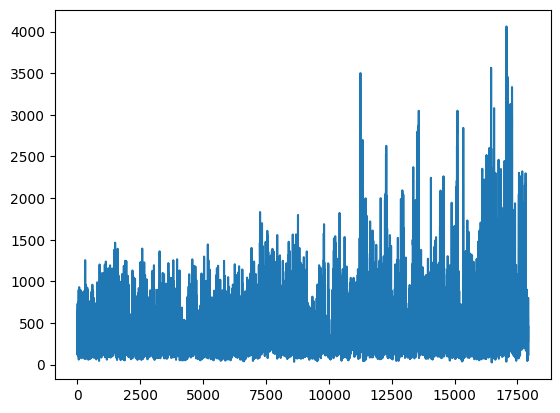

In [ ]:
import matplotlib.pyplot as plt
protein_len = [len(p) for p in df_cds['protein']]
plt.plot(protein_len)

In [ ]:
# 길이 500으로 자르기
df_cds['len'] = protein_len
df_cds = df_cds[df_cds['len']<=500].reset_index(drop=True)
df_cds

,cds,protein,len
0,ATGGCTGACCAACTGACTGAAGAGCAGATTGCAGAATTCAAAGAAG...,MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTE...,149
1,ATGGCTGACCAACTGACTGAAGAGCAGATTGCAGAATTCAAAGAAG...,MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTE...,149
2,ATGGCTGACCAACTGACTGAAGAGCAGATTGCAGAATTCAAAGAAG...,MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTE...,149
3,ATGAGGCGTGCAGGCCTGGGTGAAGGAGTACCTCCTGGCAACTATG...,MRRAGLGEGVPPGNYGNYGYANSGYSACEEENERLTESLRSKVTAI...,118
4,ATGATTATCTACCGGGACCTCATCAGCCACGATGAGATGTTCTCCG...,MIIYRDLISHDEMFSDIYKIREIADGLCLEVEGKMVSRTEGNIDDS...,172
...,...,...,...
11838,ATGCTGGCCCCGCGCGGAGCCGCCGTCCTCCTGCTGCACCTGGTCC...,MLAPRGAAVLLLHLVLQRWLAAGAQATPQVFDLLPSSSQRLNPGAL...,188
11839,ATGGAACTGTTGACATTCAGGGATGTGACCATAGAATTCTCTCTGG...,MELLTFRDVTIEFSLEEWEFLNPAQQSLYRKVMLENYRNLVSLGLT...,498
11840,ATGTCCCTTGTGACTGTCCCCTTCTACCAGAAGAGACATAGGCACT...,MSLVTVPFYQKRHRHFDQSYRNIQTRYLLDEYASKKRASTQASSQK...,110
11841,ATGCCCAAGGGTGGGTGCCCTAAAGCACCACAGCAGGAAGAGCTTC...,MPKGGCPKAPQQEELPLSSDMVEKQTGKKDKDKVSLTKTPKLERGD...,421


In [ ]:
# Codon dict 생성
import itertools
from collections import defaultdict

# AAA부터 CCC까지의 사전 생성
nucleotides = ['A', 'T', 'G', 'C']
all_codons = [''.join(p) for p in itertools.product(nucleotides, repeat=3)]
all_codons = set(all_codons) - {'TGA', 'TAA', 'TAG'} # 종결코돈 제거
codon_dict = {codon: i + 2 for i, codon in enumerate(all_codons)}
codon_dict['_'] = 0 # Padding, SOS
codon_dict['*'] = 1 # EOS
codon_dict

{'AGC': 2,
 'TGT': 3,
 'TCT': 4,
 'CGT': 5,
 'CCC': 6,
 'TTG': 7,
 'GCC': 8,
 'GTC': 9,
 'CAT': 10,
 'GCT': 11,
 'GTG': 12,
 'GAT': 13,
 'ATA': 14,
 'GCG': 15,
 'CGG': 16,
 'CCG': 17,
 'AGA': 18,
 'GGG': 19,
 'AGG': 20,
 'GTA': 21,
 'CTG': 22,
 'TTA': 23,
 'TTC': 24,
 'GTT': 25,
 'GCA': 26,
 'CTT': 27,
 'CAG': 28,
 'AAC': 29,
 'AAA': 30,
 'GAG': 31,
 'TCC': 32,
 'GAC': 33,
 'ACA': 34,
 'CTC': 35,
 'CGC': 36,
 'GGC': 37,
 'CCT': 38,
 'CGA': 39,
 'TGC': 40,
 'GAA': 41,
 'AAT': 42,
 'TCG': 43,
 'ACG': 44,
 'AGT': 45,
 'ATC': 46,
 'CAC': 47,
 'TCA': 48,
 'TGG': 49,
 'GGT': 50,
 'CTA': 51,
 'TTT': 52,
 'CAA': 53,
 'CCA': 54,
 'TAT': 55,
 'AAG': 56,
 'ACT': 57,
 'ATT': 58,
 'ACC': 59,
 'TAC': 60,
 'GGA': 61,
 'ATG': 62,
 '_': 0,
 '*': 1}

In [ ]:
# 3-mer 추출 및 BOW 전환
def get_codon_bow(dna_sequence):
    bow = []
    for i in range(0, len(dna_sequence), 3):  # 3-mer 추출
        trimer = dna_sequence[i:i+3]
        bow.append(codon_dict[trimer])
    bow.append(2) # 종결코돈 추가
    return bow

seq = 'ATGAAATTTGGGCCC'
get_codon_bow(seq)

[62, 30, 52, 19, 6, 2]

In [ ]:
df_cds['codon_bow'] = df_cds['cds'].apply(get_codon_bow)
df_cds.head()

,cds,protein,len,codon_bow
0,ATGGCTGACCAACTGACTGAAGAGCAGATTGCAGAATTCAAAGAAG...,MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTE...,149,"[62, 11, 33, 53, 22, 57, 41, 31, 28, 58, 26, 4..."
1,ATGGCTGACCAACTGACTGAAGAGCAGATTGCAGAATTCAAAGAAG...,MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTE...,149,"[62, 11, 33, 53, 22, 57, 41, 31, 28, 58, 26, 4..."
2,ATGGCTGACCAACTGACTGAAGAGCAGATTGCAGAATTCAAAGAAG...,MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTE...,149,"[62, 11, 33, 53, 22, 57, 41, 31, 28, 58, 26, 4..."
3,ATGAGGCGTGCAGGCCTGGGTGAAGGAGTACCTCCTGGCAACTATG...,MRRAGLGEGVPPGNYGNYGYANSGYSACEEENERLTESLRSKVTAI...,118,"[62, 20, 5, 26, 37, 22, 50, 41, 61, 21, 38, 38..."
4,ATGATTATCTACCGGGACCTCATCAGCCACGATGAGATGTTCTCCG...,MIIYRDLISHDEMFSDIYKIREIADGLCLEVEGKMVSRTEGNIDDS...,172,"[62, 58, 46, 60, 16, 33, 35, 46, 2, 47, 13, 31..."


In [ ]:
from Bio.Data import CodonTable
standard_table = CodonTable.standard_dna_table
codon_to_amino_acid = standard_table.forward_table
amino_acids = set(codon_to_amino_acid.values())
print(amino_acids)
print(len(amino_acids))

aa_dict = {aa:i+2 for i, aa in enumerate(amino_acids)}
aa_dict['_'] = 0 # Padding
aa_dict['*'] = 1 # EOS
print(aa_dict)

{'E', 'N', 'T', 'Y', 'L', 'W', 'D', 'R', 'A', 'V', 'K', 'I', 'Q', 'S', 'F', 'H', 'G', 'P', 'M', 'C'}
20
{'E': 2, 'N': 3, 'T': 4, 'Y': 5, 'L': 6, 'W': 7, 'D': 8, 'R': 9, 'A': 10, 'V': 11, 'K': 12, 'I': 13, 'Q': 14, 'S': 15, 'F': 16, 'H': 17, 'G': 18, 'P': 19, 'M': 20, 'C': 21, '_': 0, '*': 1}


In [ ]:
def get_aa_bow(seq):
    seq = list(seq)
    bow = [aa_dict[aa] for aa in seq]
    bow.append(1) # 종결코돈 추가
    return bow

seq = 'MADQL'
get_aa_bow(seq)

[20, 10, 8, 14, 6, 1]

In [ ]:
df_cds['aa_bow'] = df_cds['protein'].apply(get_aa_bow)
df_cds.head()

,cds,protein,len,codon_bow,aa_bow
0,ATGGCTGACCAACTGACTGAAGAGCAGATTGCAGAATTCAAAGAAG...,MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTE...,149,"[62, 11, 33, 53, 22, 57, 41, 31, 28, 58, 26, 4...","[20, 10, 8, 14, 6, 4, 2, 2, 14, 13, 10, 2, 16,..."
1,ATGGCTGACCAACTGACTGAAGAGCAGATTGCAGAATTCAAAGAAG...,MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTE...,149,"[62, 11, 33, 53, 22, 57, 41, 31, 28, 58, 26, 4...","[20, 10, 8, 14, 6, 4, 2, 2, 14, 13, 10, 2, 16,..."
2,ATGGCTGACCAACTGACTGAAGAGCAGATTGCAGAATTCAAAGAAG...,MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTE...,149,"[62, 11, 33, 53, 22, 57, 41, 31, 28, 58, 26, 4...","[20, 10, 8, 14, 6, 4, 2, 2, 14, 13, 10, 2, 16,..."
3,ATGAGGCGTGCAGGCCTGGGTGAAGGAGTACCTCCTGGCAACTATG...,MRRAGLGEGVPPGNYGNYGYANSGYSACEEENERLTESLRSKVTAI...,118,"[62, 20, 5, 26, 37, 22, 50, 41, 61, 21, 38, 38...","[20, 9, 9, 10, 18, 6, 18, 2, 18, 11, 19, 19, 1..."
4,ATGATTATCTACCGGGACCTCATCAGCCACGATGAGATGTTCTCCG...,MIIYRDLISHDEMFSDIYKIREIADGLCLEVEGKMVSRTEGNIDDS...,172,"[62, 58, 46, 60, 16, 33, 35, 46, 2, 47, 13, 31...","[20, 13, 13, 5, 9, 8, 6, 13, 15, 17, 8, 2, 20,..."


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

aa_bow = df_cds['aa_bow']
codon_bow = df_cds['codon_bow']

max_aa_len = max([len(seq) for seq in aa_bow])
max_codon_len = max([len(seq) for seq in codon_bow])

aa_bow = pad_sequences(aa_bow, maxlen=max_aa_len, padding='post')
codon_bow = pad_sequences(codon_bow, maxlen=max_codon_len, padding='post')

In [ ]:
len(aa_bow[0])

501

In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-fpqfdpln
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-fpqfdpln
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# 하이퍼파라미터 설정
aa_latent_dim = 22
codon_latent_dim = 66
latent_dim = 256

# 인코더 정의
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(input_dim=len(aa_dict), output_dim=aa_latent_dim)(encoder_inputs)
encoder_embedding = Dropout(0.2)(encoder_embedding)  # Dropout 추가
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# 디코더 정의
decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(input_dim=len(codon_dict), output_dim=codon_latent_dim)(decoder_inputs)
decoder_embedding = Dropout(0.2)(decoder_embedding)  # Dropout 추가
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_outputs = BatchNormalization()(decoder_outputs)  # Batch Normalization 추가
decoder_dense = Dense(len(codon_dict), activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Seq2Seq 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# 옵티마이저 및 학습률 스케줄러 설정
learning_rate = 1e-2
optimizer = Adam(learning_rate=learning_rate)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-3)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_22            │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_23            │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_12 (Embedding)  │ (None, None, 22)       │            484 │ input_layer_22[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_13 (Embedding)  │ (None, None, 66)       │          4,158 │ input_layer_23[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_12 (Dropout)      │ (None, None, 22)       │              0 │ embedding_12[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout)      │ (None, None, 66)       │              0 │ embedding_13[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_12 (LSTM)            │ [(None, 256), (None,   │        285,696 │ dropout_12[0][0]       │
│                           │ 256), (None, 256)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_13 (LSTM)            │ [(None, None, 256),    │        330,752 │ dropout_13[0][0],      │
│                           │ (None, 256), (None,    │                │ lstm_12[0][1],         │
│                           │ 256)]                  │                │ lstm_12[0][2]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, None, 256)      │          1,024 │ lstm_13[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, None, 63)       │         16,191 │ batch_normalization_6… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 638,305 (2.43 MB)

 Trainable params: 637,793 (2.43 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
# 디코더 출력 데이터 준비
decoder_input_data = np.zeros_like(codon_bow)
decoder_input_data[:, 1:] = codon_bow[:, :-1]
decoder_output_data = np.expand_dims(codon_bow, -1)

# 모델 훈련
model.fit([aa_bow, decoder_input_data], decoder_output_data,
          batch_size=64, epochs=50, validation_split=0.2,
          callbacks=[reduce_lr])

Epoch 1/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.4325 - loss: 2.4163 - val_accuracy: 0.4470 - val_loss: 2.3250 - learning_rate: 0.0100
Epoch 2/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.4643 - loss: 2.2068 - val_accuracy: 0.4514 - val_loss: 2.3011 - learning_rate: 0.0100
Epoch 3/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.4705 - loss: 2.1751 - val_accuracy: 0.4523 - val_loss: 2.2725 - learning_rate: 0.0100
Epoch 4/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.4739 - loss: 2.1588 - val_accuracy: 0.4532 - val_loss: 2.2413 - learning_rate: 0.0100
Epoch 5/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.4726 - loss: 2.1621 - val_accuracy: 0.4586 - val_loss: 2.2048 - learning_rate: 0.0100
Epoch 6/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.4694 - loss: 2.1720 - val_accuracy: 0.4587 - val_loss: 2.2061 - learning_rate: 0.0100
Epoch 7/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.4763 - loss: 2.

In [ ]:
codon_dict_inv = {value:key for key,value in codon_dict.items()}
aa_dict_inv = {value:key for key,value in aa_dict.items()}

In [ ]:
# Define inference models
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs, state_h, state_c = decoder_lstm(decoder_embedding, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)

decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

In [ ]:
def decode_sequence(input_seq):
    states_value = encoder_model.predict(input_seq, verbose=0)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = codon_dict['_']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value, verbose=0)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = codon_dict_inv[sampled_token_index]

        decoded_sentence += sampled_char

        if sampled_char == '*' or len(decoded_sentence) > max_codon_len:
            stop_condition = True

        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        states_value = [h, c]

    return decoded_sentence

# Test the decoding function
print("Amino acid sequence:", df_cds['protein'][0])
test_seq = aa_bow[0:1]
decoded_sequence = decode_sequence(test_seq)
print("Decoded sequence:", decoded_sequence)
print("Originalsequence:", df_cds['cds'][0])

Amino acid sequence: MADQLTEEQIAEFKEAFSLFDKDGDGTITTKELGTVMRSLGQNPTEAELQDMINEVDADGNGTIDFPEFLTMMARKMKDTDSEEEIREAFRVFDKDGNGYISAAELRHVMTNLGEKLTDEEVDEMIREADIDGDGQVNYEEFVQMMTAK
Decoded sequence: ATGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCGGCAGCGGCGGCGGCGGCAGCAGCGGCGGCGGCAGCAGCGGCGGCGGCA
Originalsequence: ATGGCTGACCAACTGACTGAAGAGCAGATTGCAGAATTCAAAGAAGCTTTTTCACTATTTGACAAAGATGGTGATGGAACTATAACAACAAAGGAATTGGGAACTGTAATGAGATCTCTTGGGCAGAATCCCACAGAAGCAGAGTTACAGGACATGATTAATGAAGTAGATGCTGATGGTAATGGCACAATTGACTTCCCTGAATTTCTGACAATGATGGCAAGAAAAATGAAAGACACAGACAGTGAAGAAGAAATTAGAGAAGCATTCCGTGTGTTTGATAAGGAT